In [99]:
#Imports
import pandas
import plotnine
from scipy.stats import ttest_ind
import matplotlib
import geopandas
import plotly.express
import numpy
from IPython.display import HTML

#Reads
#participation_per_country_data = pandas.read_csv('./data/participation-per-country.csv')
#geographies_data = pandas.read_csv('./data/raw/geographies.csv')
#stackoverflow_data = pandas.read_csv('./data/raw/stackoverflow.csv')
#superuser_data = pandas.read_csv('./data/raw/superuser.csv')
data = pandas.read_csv('./data/sdsu.csv')


pandas.set_option('display.max_columns', None)
[len(data),len(data_m),len(data_f),]

[155, 38, 117]

### Anuncio do LAB 4 no classroom
Pessoal, o link abaixo contém o acesso ao repositório base do laboratório. A partir deles vocês irão criar um novo repositório privado no github classroom, que ficará hospedado na organização da disciplina. O repositório base contém dados e questões **(em reports/analise-um-lab-parte2.Rmd)** que deverão ser respondidas individualmente como resultado do lab, considerando o que foi visto sobre Intervalos de Confiança. O lab deve ser respondido a partir de artefatos de código para a análise (R, R Markdown, Python, Jupyter e/ou Colab). 

O README do repositório explica o contexto do estudo e possui links para os dados e o estudo original, que trata de inferência de escores IAT (Implicit Association Tests). 

A avaliação desse laboratório é sobre a precisão, completude e clareza de sua interpretação dos resultados. 

Além disso, queremos explorar o cálculo de ICs usando uma implementação de vocês. Vocês devem escolher uma base de dados de estudo para realizar suas análises ("data/base.csv") configurando o Rmd 'arquivo_dados: "data/base.csv"'

# Introdução à inferência estatística  (Introdução)

Usamos os dados de um experimento replicado em 30 e poucos laboratórios pelo mundo. O experimento está descrito [aqui](https://osf.io/wx7ck/) e o link direto para os dados originais [é esse](https://osf.io/nqg97/). Nós usamos uma versão tratada [disponível aqui](https://github.com/rcalinjageman/New_Stats_Teaching_Resources/tree/dae9981eb9a7bc373501a4ff9477498ee466ceac/workshop%20data/two_groups%20-%20iat/iat_data%20_csv) e criada por Robert J Calin-Jageman e colegas para o Teaching the New Statistics workshop.

O estudo do 1o link replica diversos experimentos da psicologia. O que usamos aqui é: "Sex differences in implicit math attitudes (Nosek,Banaji, & Greenwald, 2002).As a possible account for the sex gap in participation in science and math, Nosek and colleagues (2002) found that women had more negative implicit attitudes toward math compared to arts than men did in two studies of Yale undergraduates. Participants completed four Implicit Association Tests (IATs) in random order, one of which measured associations of math and arts with positivity and negativity. The replication simplified the design for length to be just a single IAT."


### Como ler este report

Neste report foi embeddado o html gerado a partir do R. Foi o jeito que encontrei de reaproveitar o que foi gerado de código para atividade. A conclusão foi copiada diretamente para seguir os passos requisitados pela atividade. 

Como a página do git está bastante desorganizada e não consegui entender exatamente o que era para fazer só olhando no report fui no classroom e aproveitei para copiar aqui também. Desta forma posso ir olhando pelo readme.md e pelo anuncio do classroom para me guiar na construção deste report. Aproveito também para permanecer com estes pontos aqui pois pode me ajudar em estudos futuros sobre os temas abordados neste report, uma vez que estes pontos vão me ajudar a entender o que é este estudo.

A 2a parte desta atividade (exploração de cálculos de ICs) será feita a seguir da análise da conclusão.

Foi necessário alterar o report original para pegar o N. das amostras e o std. dev. das amostras.



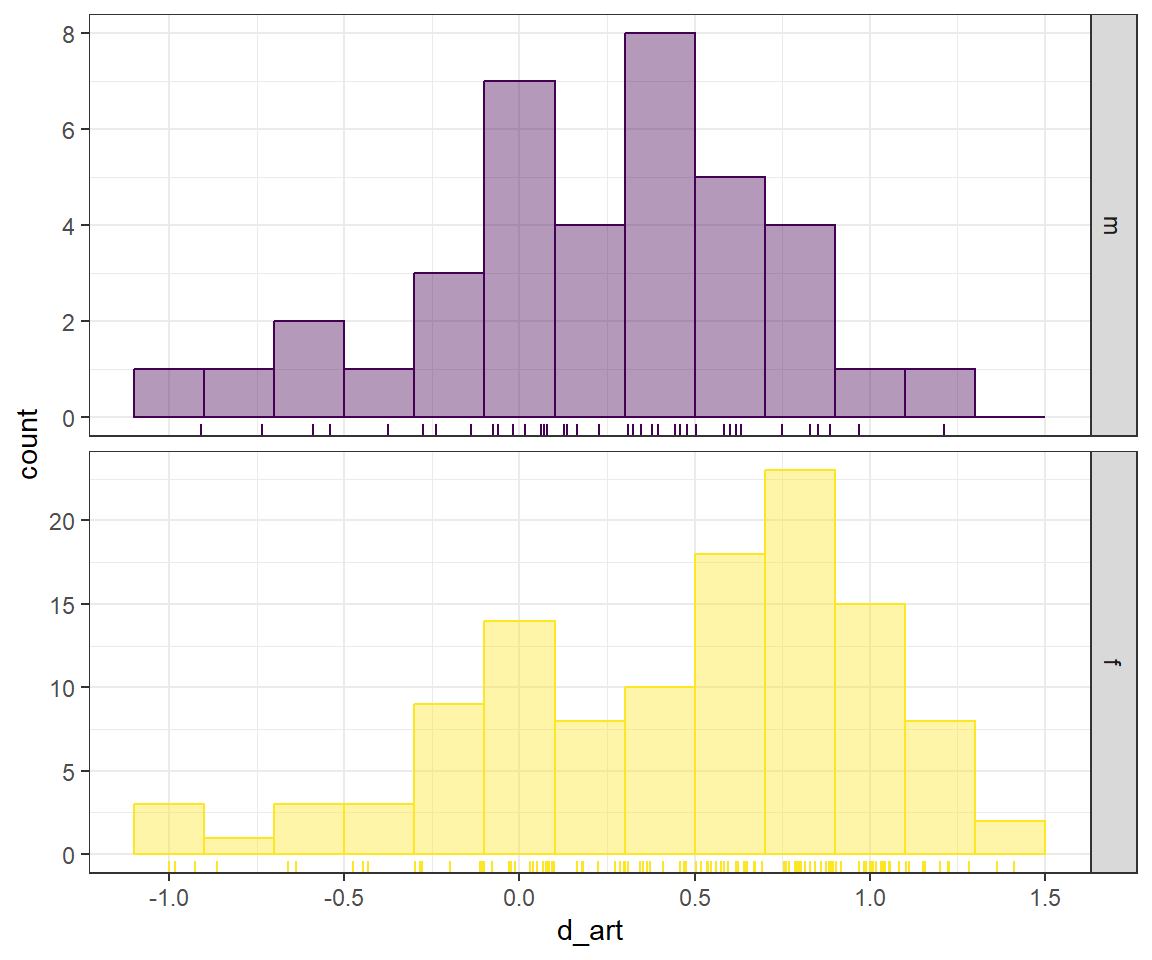
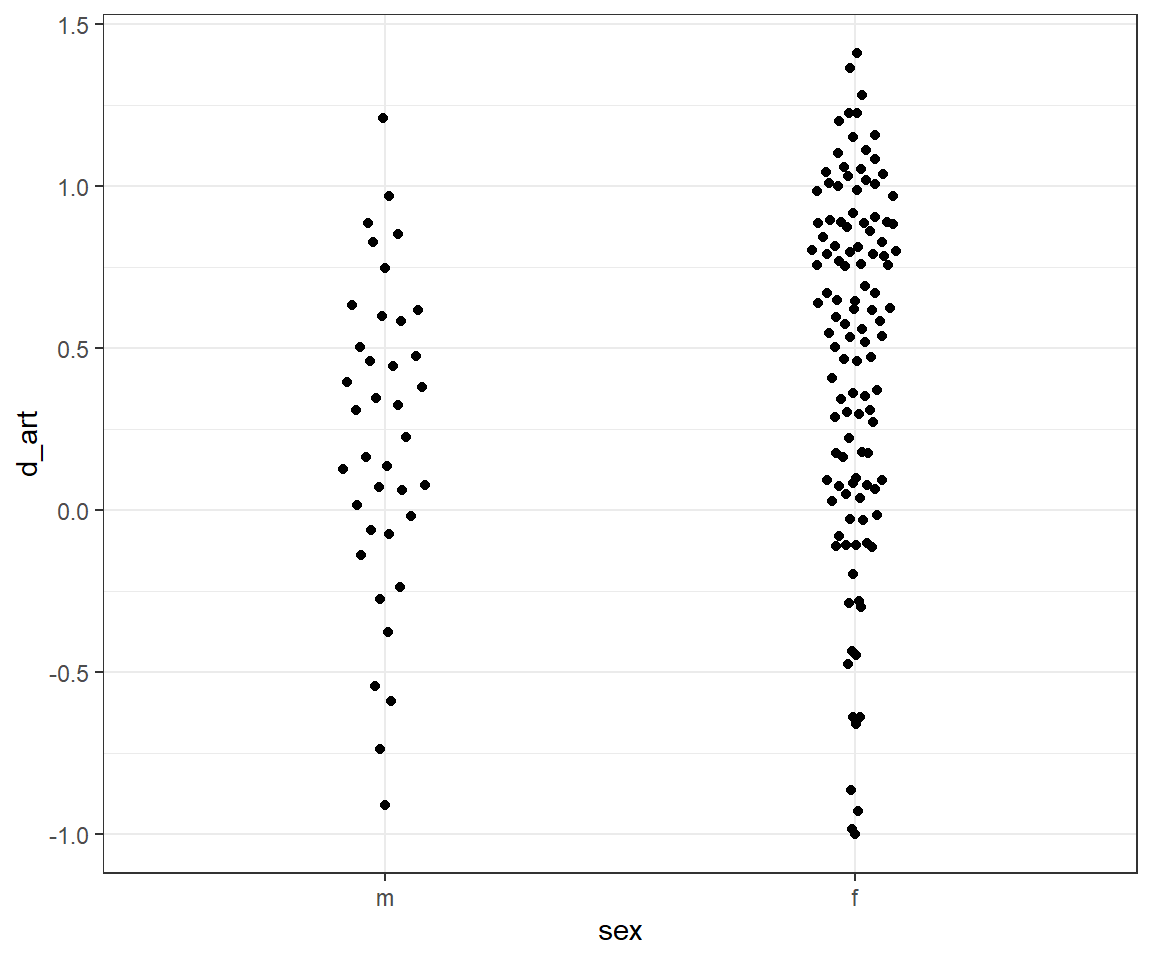
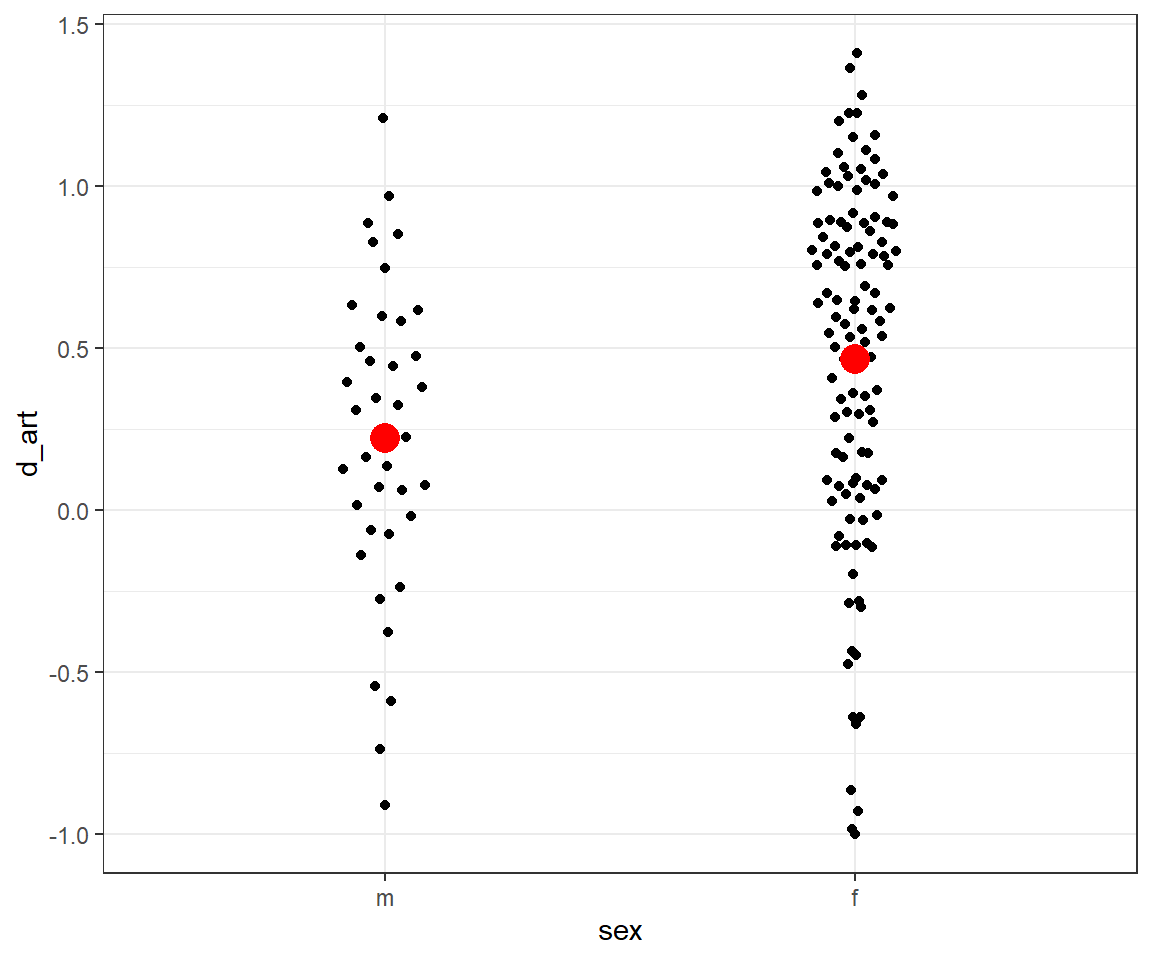
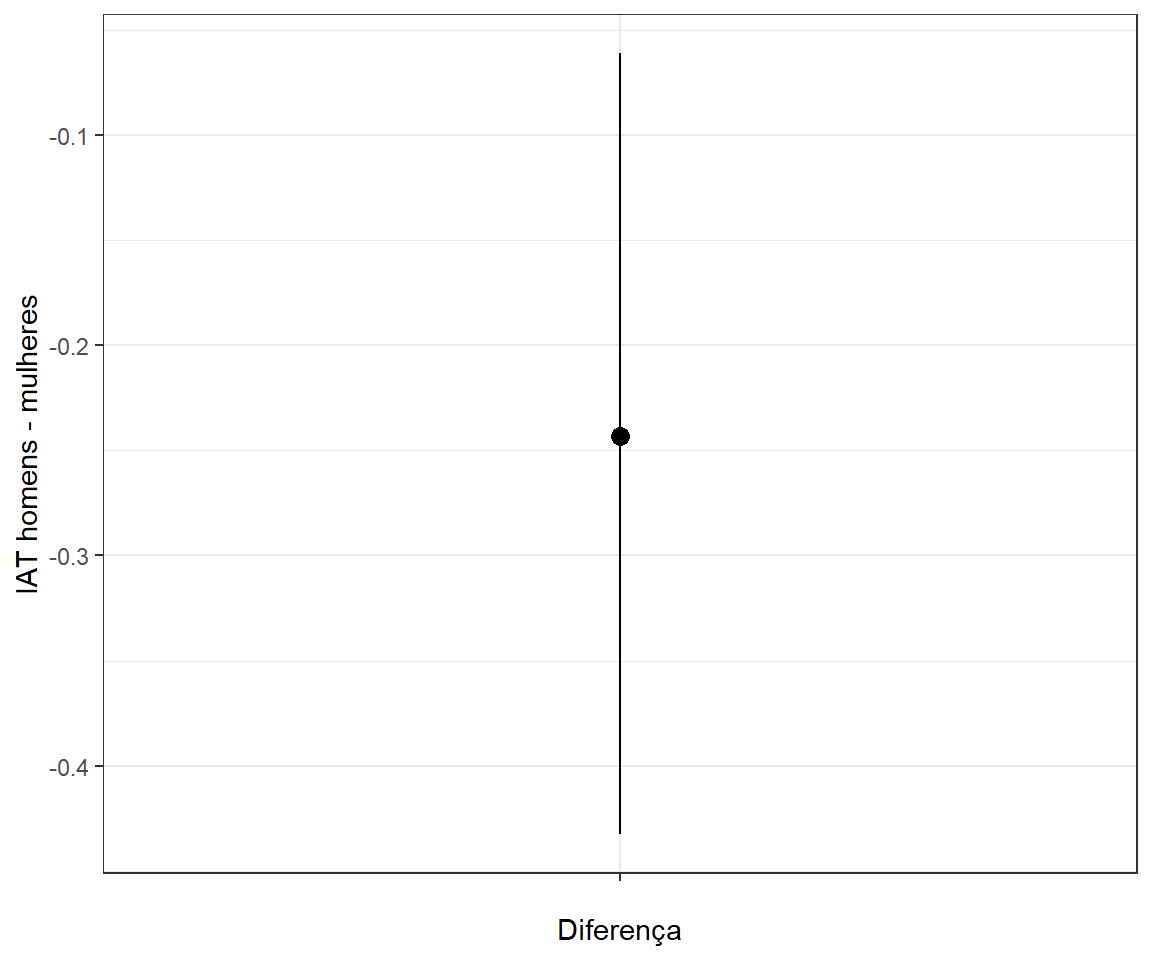
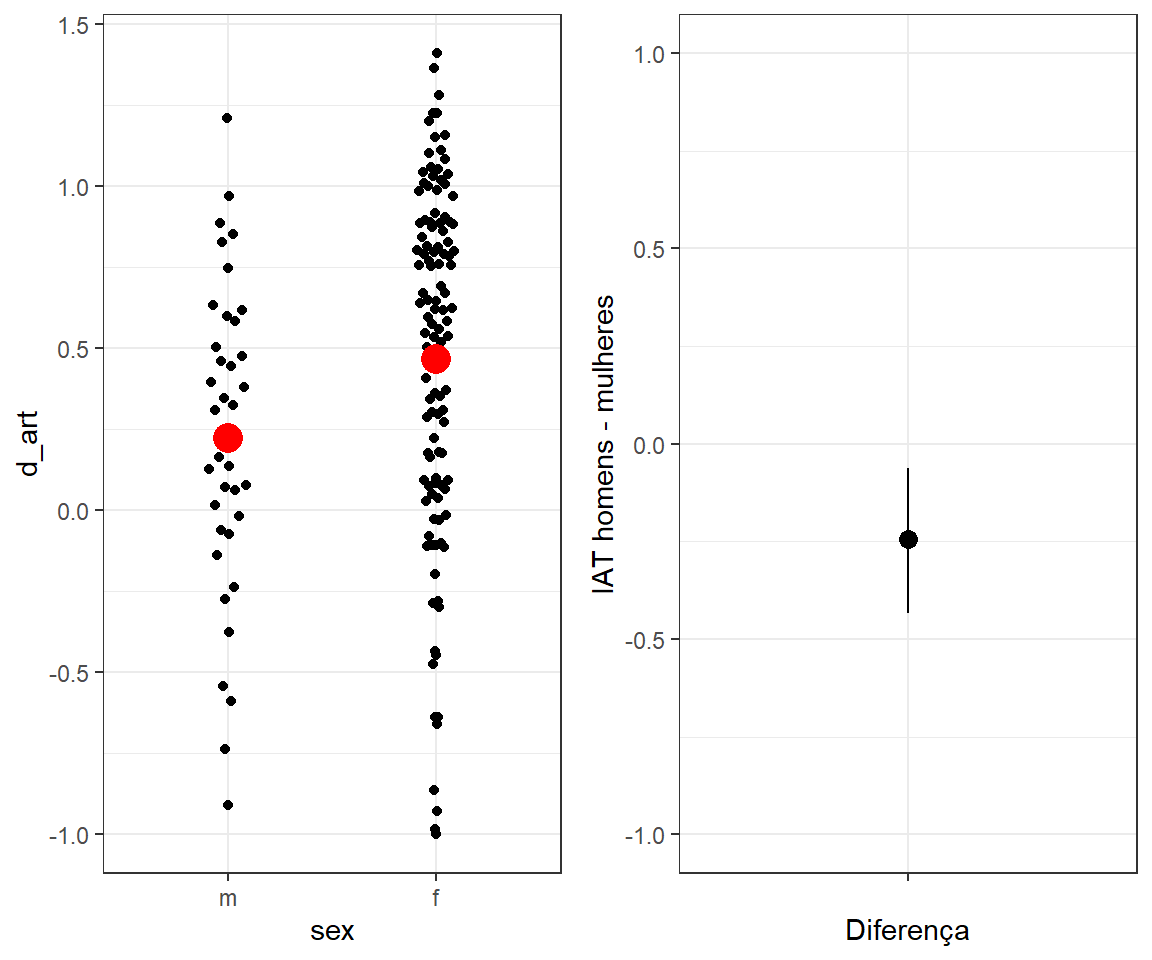

In [10]:
#HTML(filename="reports/todos-os-labs.html")
#HTML(filename="reports/analise-um-lab.html")
HTML(filename="reports/analise-um-lab-parte2.html")


### Conclusão

Considerando os dados da replicação do estudo "Sex differences in implicit math attitudes", em média, as mulheres que participaram do experimento tiveram uma associação implícita (medida pelo IAT) com a matemática **negativa** e **média** (média 0.467, desvio padrão 0.547, N = 117). Homens tiveram uma associação **positiva** com a matemática, portanto **menor** que a das mulheres (média 0.223, desv. padrão 0.485, N = 38). Houve portanto uma **considerável** diferença entre homens e mulheres (diferença das médias 0.243).

Mulheres possuem uma associação vies de preferência a artes em detrimento de matemática, com uma média de IAT de 0.467 que é considerado entre médio e alto, já os homens possuem uma média de IAT de 0.223 que é considerado baixo viés de preferência em artes em detrimento de matemática, ou seja a preferem a matemática. Desta forma há uma diferença considerável entre as médias dos homens e mulheres (0.243).



### Realize novas análises sobre IAT usando as abordagens a seguir

Realize a análise e compare as conclusões obtidas nos dois casos experimentados:

* bootstraps a partir de uma biblioteca (exemplo acima)
* bootstraps implementados por você (justifique o método de IC com bootstraps escolhido)

In [103]:
def mean_from_sample(data):
    data_m = data.loc[(data["sex"]=="m")]
    data_f = data.loc[(data["sex"]=="f")]
    
    bm = data_m.iloc[numpy.random.choice(30,replace=True,size=50)] #sample
    bf = data_f.iloc[numpy.random.choice(30,replace=True,size=50)]

    return (bm['d_art'].mean(), bf['d_art'].mean())


def bootstrap(data,rep=2000):
    #set seed pra fazer ser determinístico
    numpy.random.seed(seed=1337)
    #calcula as médias
    mean_samples = []
    for i in range(rep):
        mean_samples.append(mean_from_sample(data))

    #transforma em df
    dataframe=pandas.DataFrame(mean_samples)
    dataframe.columns=["media homens","media mulheres"]
    return dataframe

mean_boot = bootstrap(data)
alpha = .05

m = mean_boot.mean()
m


media homens      0.184645
media mulheres    0.445110
dtype: float64

In [116]:
ci_lower = mean_boot.quantile(alpha/2)
ci_upper = mean_boot.quantile(1.0 - alpha/2)
[ci_lower,ci_upper]

[media homens      0.044192
 media mulheres    0.299416
 Name: 0.025, dtype: float64,
 media homens      0.329669
 media mulheres    0.585432
 Name: 0.975, dtype: float64]

### Calculando o Intervalo de confiança utilizando o Percentil

Intervalos de confiança com 95% de confiança utilizando o método do percentil temos que está entre 0.04 e 0.32 para homens; e para mulheres está entre 0.29 e 0.58. Utilizei o método do percentil por ser um cálculo de mais simples formularização, bem como por ser o que se encontra no material. Que podem ser visualizadas nos gráficos a seguir sendo azul o limite inferior e o vermelho o limite superior.



C:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 31'. Pick better value with 'binwidth'.


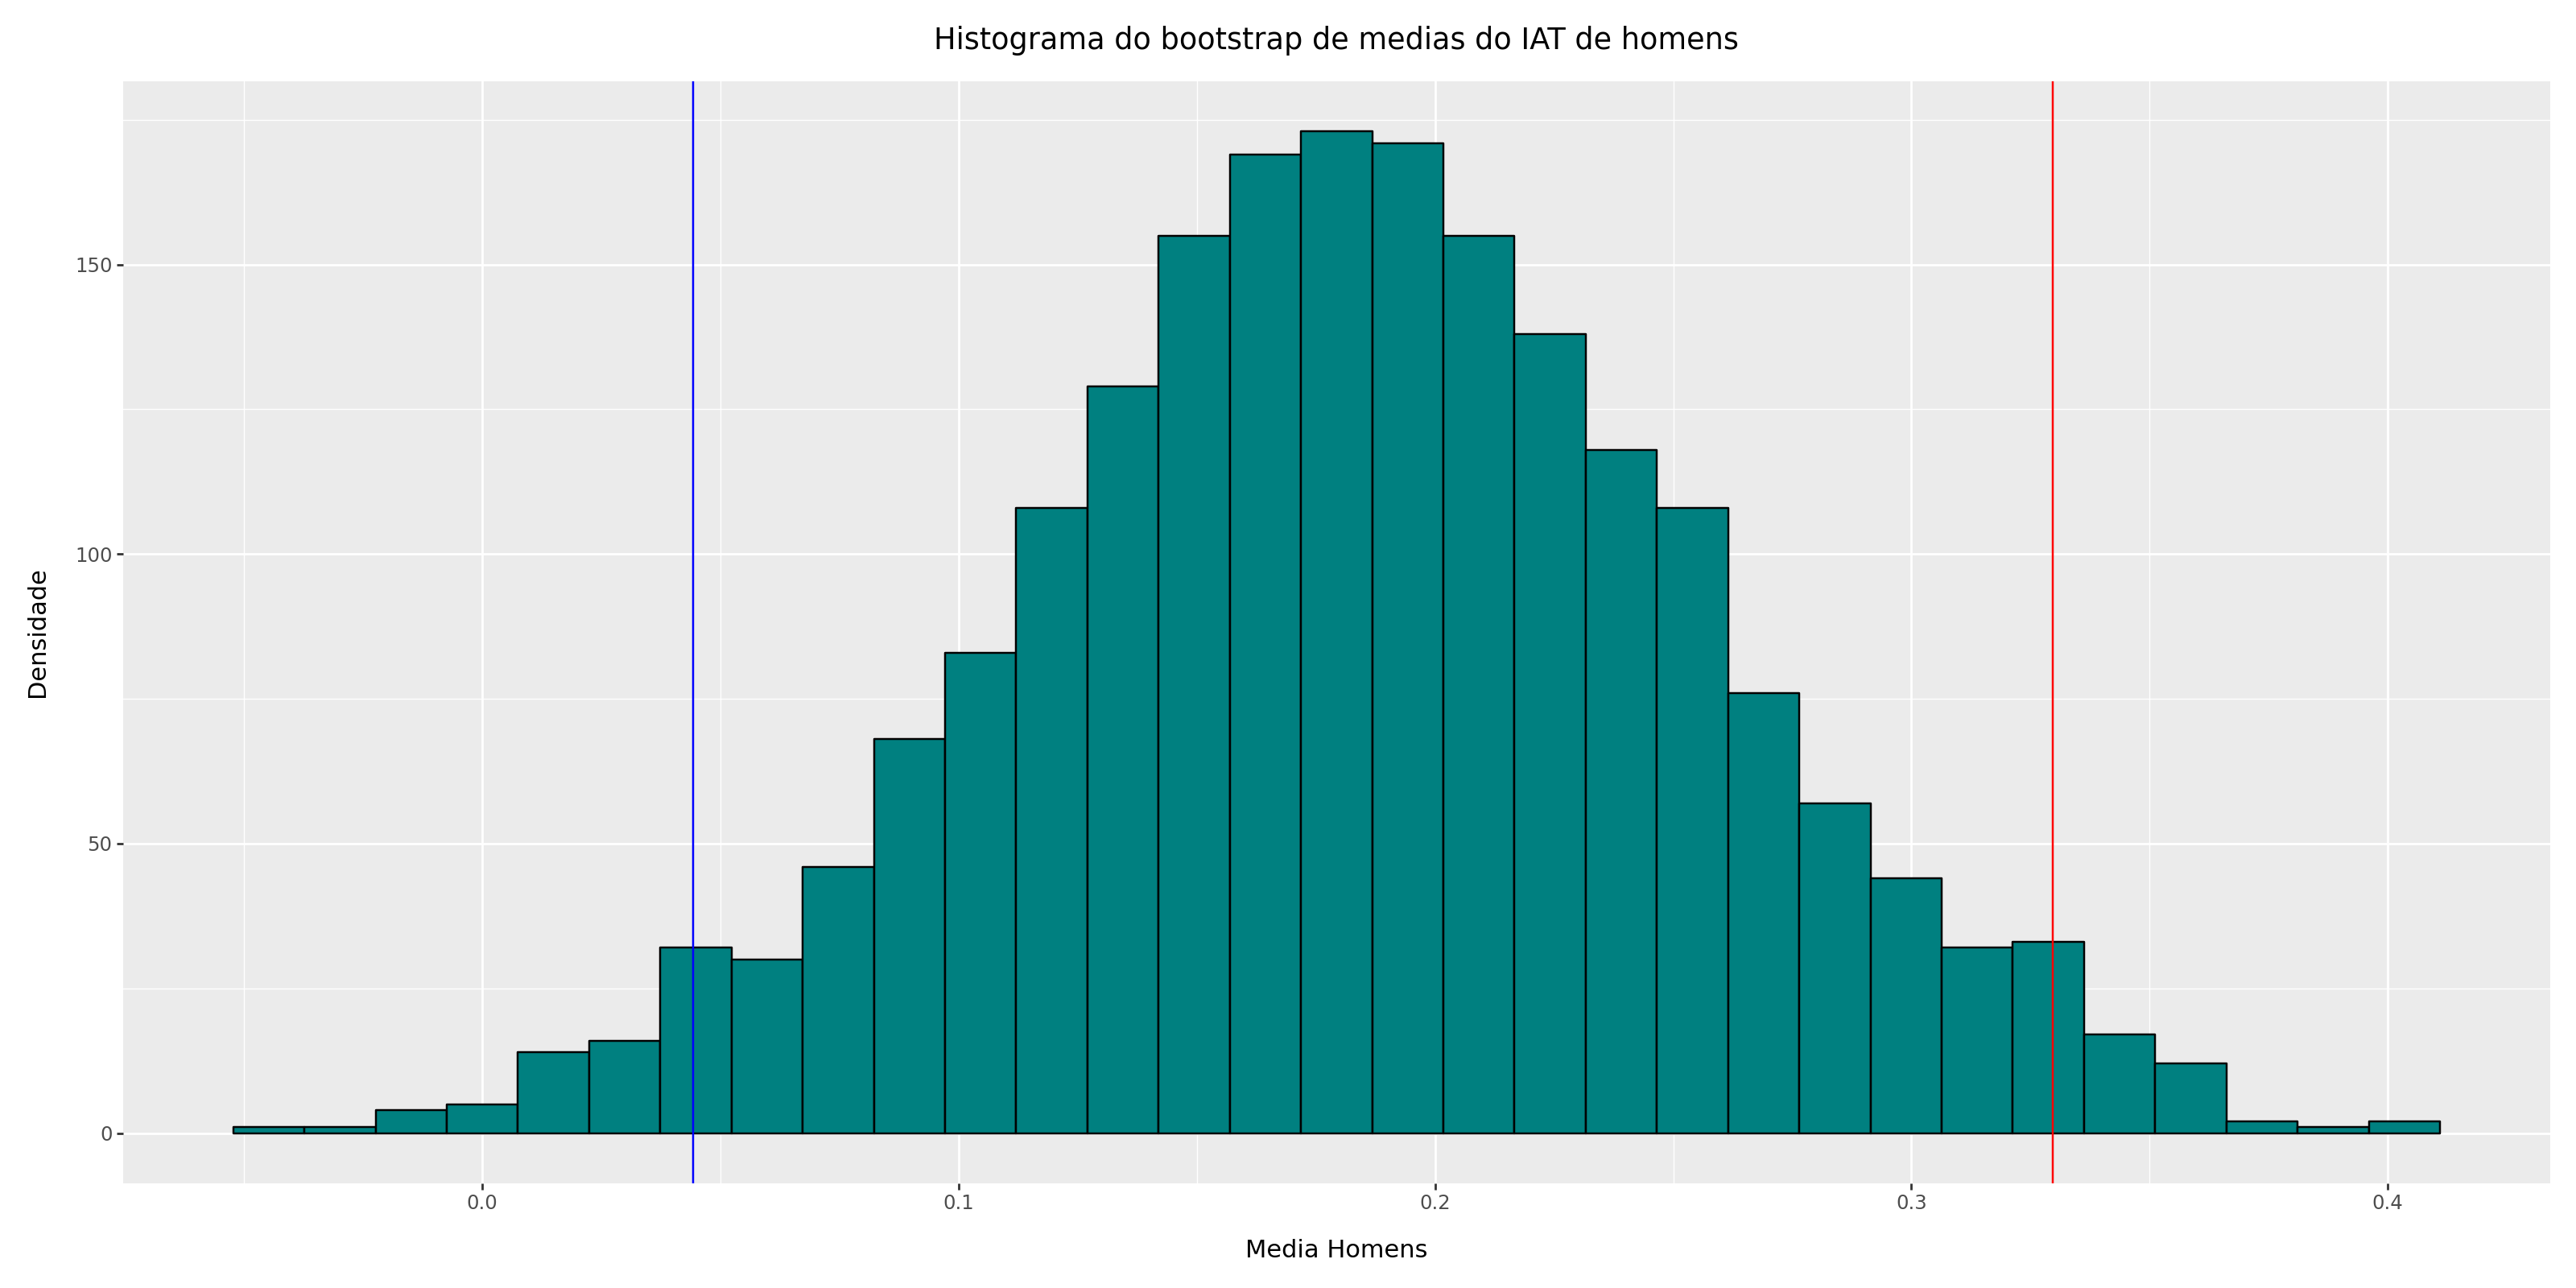

In [122]:
(
    plotnine.ggplot(mean_boot) + 
     plotnine.aes(x='media homens') + 
     plotnine.geom_histogram(fill="teal", color = "black", alpha = 1) + 
     plotnine.xlab("Media Homens") + 
     plotnine.ylab("Densidade") +
     plotnine.ggtitle("Histograma do bootstrap de medias do IAT de homens") + 
     plotnine.geom_vline(xintercept=ci_lower["media homens"], color="blue") + 
     plotnine.geom_vline(xintercept=ci_upper["media homens"], color="red") + 
     plotnine.theme(figure_size=(16, 8))
)

C:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 31'. Pick better value with 'binwidth'.


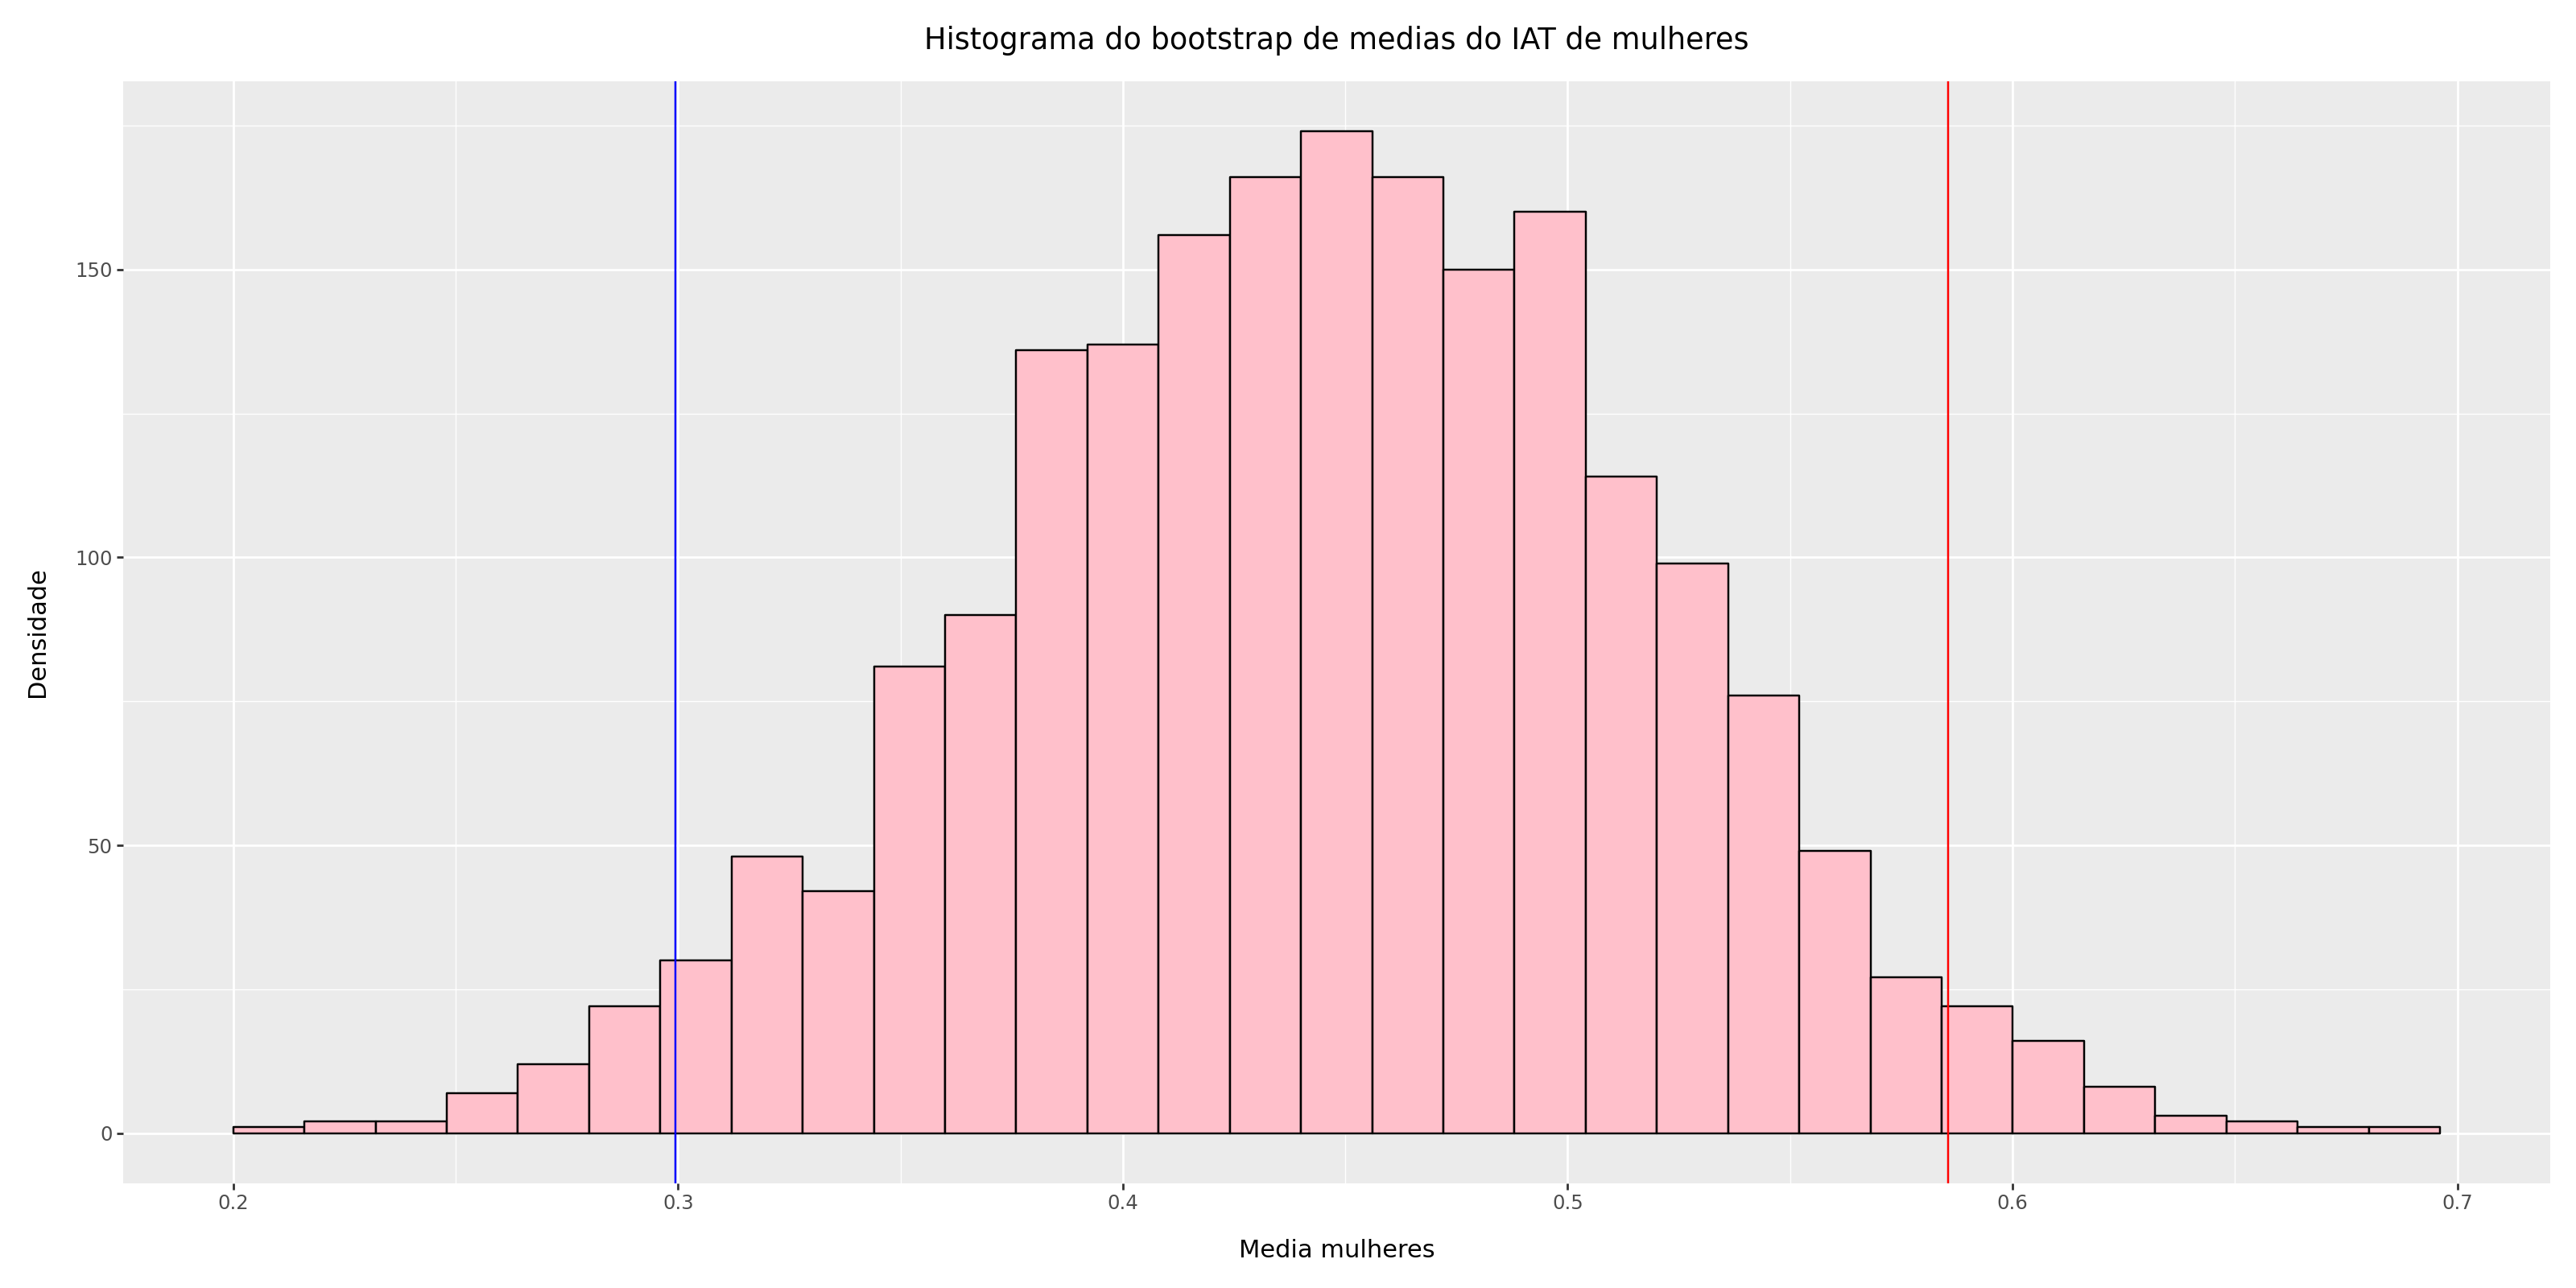

In [123]:
(
    plotnine.ggplot(mean_boot) + 
     plotnine.aes(x='media mulheres') + 
     plotnine.geom_histogram(fill="pink", color = "black", alpha = 1) + 
     plotnine.xlab("Media mulheres") + 
     plotnine.ylab("Densidade") +
     plotnine.ggtitle("Histograma do bootstrap de medias do IAT de mulheres") + 
     plotnine.geom_vline(xintercept=ci_lower["media mulheres"], color="blue") + 
     plotnine.geom_vline(xintercept=ci_upper["media mulheres"], color="red") + 
     plotnine.theme(figure_size=(16, 8))
)

In [98]:
mean_boot.describe()

,media homens,media mulheres
count,2000.000000,2000.000000
mean,0.184645,0.445110
std,0.071054,0.072636
min,-0.041245,0.208229
25%,0.138779,0.395535
50%,0.183354,0.446113
75%,0.232049,0.496217
max,0.407068,0.688271


### Conclusão parte 2
Com bootstrap de 2000 repetições foi obtido uma média de de 0.18 para homens com desvio padrão de 0.07, mediana 0.18, amostra de tamanho N = 38 e 2000 samples obtidos a partir destas amostras.

Já para mulheres foi obtida uma média de 0.44 com desvio padrão de 0.07, mediana 0.44 e uma amostra de tamanho N=117 que foram utilizadas 2000 samples para o bootstrap a partir destas amostras. 

A diferença entre o IAT de homens e mulheres é de 0.26. Nesta segunda análise houve um aumento pequeno da diferença entre o IAT de homens e mulheres. de forma que o resultado se repete. E as conclusões se repetem também:

Mulheres possuem uma associação vies de preferência a artes em detrimento de matemática, com uma média de IAT de 0.44 que é considerado entre médio e alto, já os homens possuem uma média de IAT de 0.18 que é considerado baixo viés de preferência em artes em detrimento de matemática, ou seja possuem preferência na matemática. Desta forma há uma diferença considerável entre as médias dos homens e mulheres.